In [ ]:
import pandas as pd

df = pd.read_csv("StudentPerformanceFactors.csv")
print(df.head())
print(df.info())
print(df.describe())


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [ ]:
# Check dataset info
df.info()

# Summary statistics
df.describe()

# Missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Fill missing categorical columns with mode
for col in ['Parental_Education_Level', 'Teacher_Quality', 'Distance_from_Home']:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)  # safer than mean for skewed data

# Double-check no nulls remain
print(df.isnull().sum())


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


/tmp/ipython-input-1808973022.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


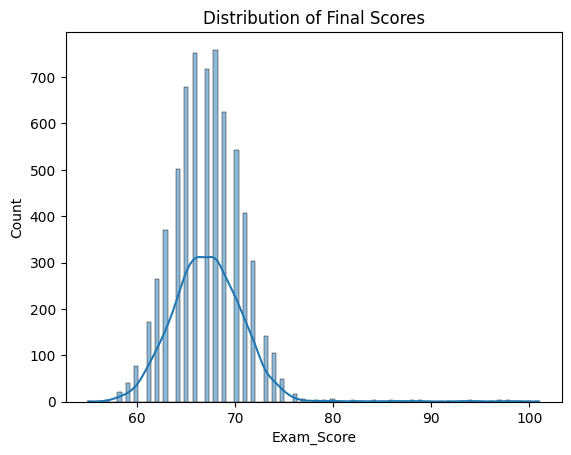

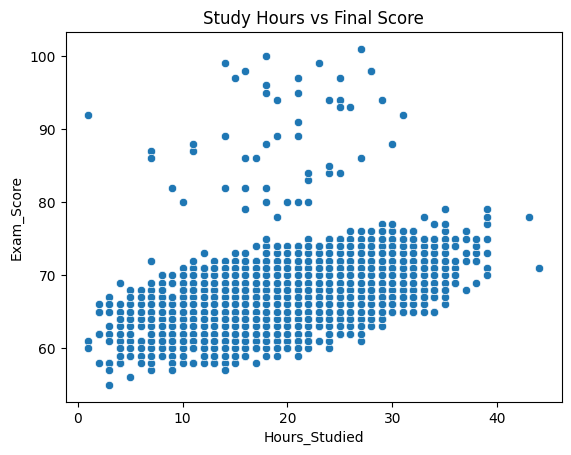

In [ ]:
# Distribution of final scores
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Exam_Score'], kde=True)
plt.title("Distribution of Final Scores")
plt.show()

# Study Hours vs Final Score
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Study Hours vs Final Score")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include='object').columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer for one-hot encoding and passing through numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline with the preprocessor and the Linear Regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_lr = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print("Linear Regression RMSE:", rmse)
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 1.804444509272284
Linear Regression R²: 0.7696495724907312


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Identify categorical and numerical columns (assuming X_train and X_test are already defined)
categorical_cols = X_train.select_dtypes(include='object').columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns


# Create a column transformer for one-hot encoding and passing through numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline with preprocessing and PolynomialFeatures
poly_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('poly', PolynomialFeatures(degree=2))])


# Apply polynomial features
X_poly_train = poly_pipeline.fit_transform(X_train)
X_poly_test = poly_pipeline.transform(X_test)

# Train the Linear Regression model on the polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)

# Make predictions
y_pred_poly = lr_poly.predict(X_poly_test)

# Evaluate the model
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print("Polynomial Regression RMSE:", rmse_poly)
print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))

Polynomial Regression RMSE: 1.8906266093640451
Polynomial Regression R²: 0.7471205766472704


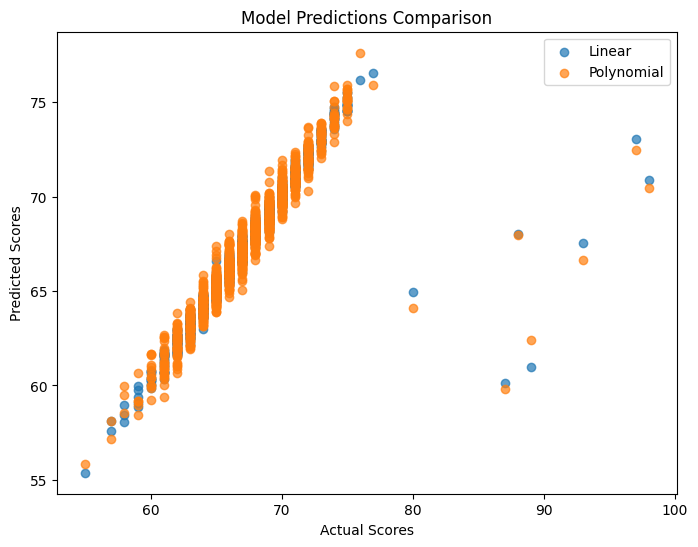

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, label="Linear", alpha=0.7)
plt.scatter(y_test, y_pred_poly, label="Polynomial", alpha=0.7)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.legend()
plt.title("Model Predictions Comparison")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns for ML
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [ ]:
target = 'Exam_Score'  # Change if your dataset has a different name
base_features = [col for col in df.columns if col != target]

X = df[base_features]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_features(features):
    X_train, X_test, y_train, y_test = train_test_split(
        df[features], y, test_size=0.2, random_state=42
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "features": features,
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

# Experiment 1: All features
results = []
results.append(evaluate_features(base_features))

# Experiment 2: Remove 'Sleep_Hours'
features_no_sleep = [f for f in base_features if 'Sleep' not in f]
results.append(evaluate_features(features_no_sleep))

# Experiment 3: Remove 'Participation'
features_no_participation = [f for f in base_features if 'Participation' not in f]
results.append(evaluate_features(features_no_participation))

# Experiment 4: Only 'Study_Hours', 'Sleep_Hours', 'Participation'
# Note: 'Study_Hours' and 'Participation' columns might not exist in your dataframe.
# I will check the columns in base_features and only include those that exist.
selected_features = ['Hours_Studied', 'Sleep_Hours', 'Physical_Activity'] # Using existing columns
existing_selected_features = [f for f in selected_features if f in base_features]
results.append(evaluate_features(existing_selected_features))


pd.DataFrame(results)

,features,RMSE,R2
0,"[Hours_Studied, Attendance, Parental_Involveme...",2.097445,0.688769
1,"[Hours_Studied, Attendance, Parental_Involveme...",2.095656,0.689299
2,"[Hours_Studied, Attendance, Parental_Involveme...",2.097445,0.688769
3,"[Hours_Studied, Sleep_Hours, Physical_Activity]",3.302080,0.228604


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()



,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Target column
target = 'Exam_Score'
y = df[target]

# Different feature combinations
feature_sets = {
    "All Features": [col for col in df.columns if col != target],
    "No Sleep": [col for col in df.columns if col != target and 'Sleep' not in col],
    "No Participation": [col for col in df.columns if col != target and 'Participation' not in col],
    "Core Features": ['Hours_Studied', 'Sleep_Hours', 'Physical_Activity']
}

# Store predictions
predictions_dict = {}

for name, features in feature_sets.items():
    X = df[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions_dict[name] = (y_test.reset_index(drop=True), pd.Series(y_pred))

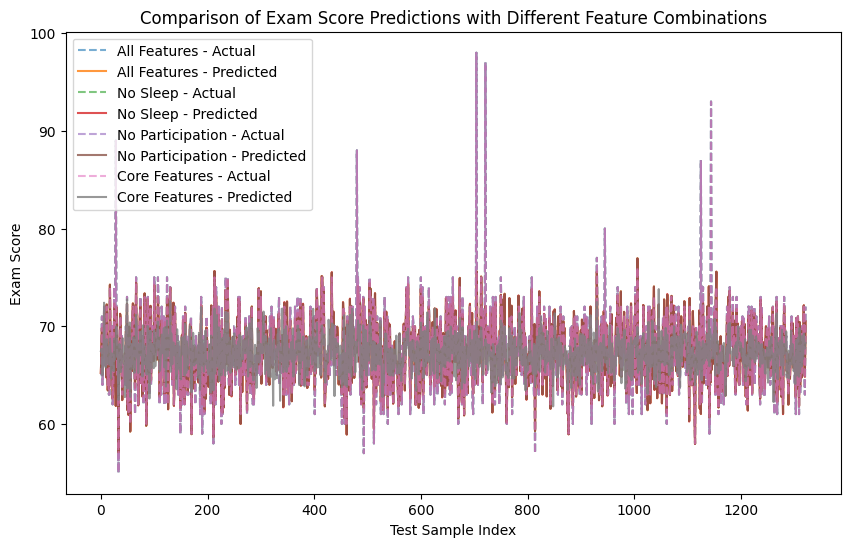

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for name, (y_true, y_pred) in predictions_dict.items():
    plt.plot(y_true.values, label=f"{name} - Actual", linestyle="--", alpha=0.6)
    plt.plot(y_pred.values, label=f"{name} - Predicted", alpha=0.8)

plt.title("Comparison of Exam Score Predictions with Different Feature Combinations")
plt.xlabel("Test Sample Index")
plt.ylabel("Exam Score")
plt.legend()
plt.show()


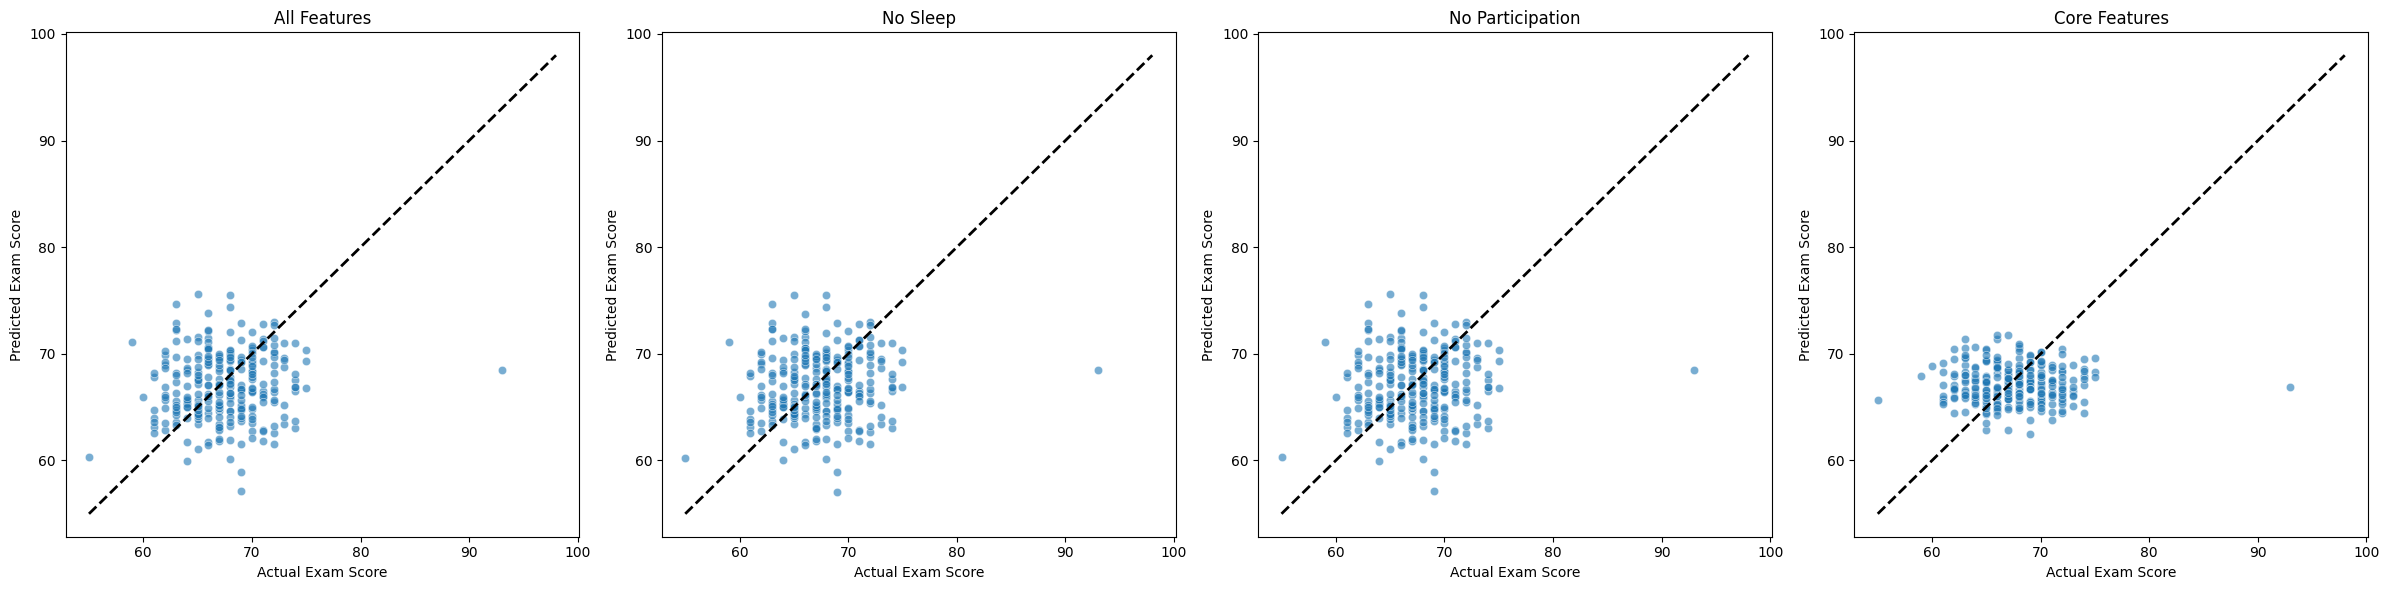

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store predictions
predictions_dict = {}

# Re-run the prediction part to get predictions_dict
# Assuming df, target, y, and feature_sets are already defined from previous cells
for name, features in feature_sets.items():
    X = df[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions_dict[name] = (y_test.reset_index(drop=True), pd.Series(y_pred, index=y_test.index)) # Preserve original index for plotting

# Create scatter plots for each feature set
fig, axes = plt.subplots(1, len(feature_sets), figsize=(6 * len(feature_sets), 6))
axes = axes.flatten() # Flatten in case there's only one subplot

for i, (name, (y_true, y_pred)) in enumerate(predictions_dict.items()):
    sns.scatterplot(x=y_true, y=y_pred, ax=axes[i], alpha=0.6)
    axes[i].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2) # Add a diagonal line for perfect prediction
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel("Actual Exam Score")
    axes[i].set_ylabel("Predicted Exam Score")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Re-create label encoders
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Example input (change these values to test your own case)
input_data = {
    'Hours_Studied': 8,       # hours per day - Corrected column name
    'Sleep_Hours': 8,       # hours per night
    'Physical_Activity': 1, # Using Physical_Activity based on Core Features
}

# Convert to DataFrame
# Need to create a DataFrame with all columns that were used for training the model
# Using 'Core Features' which are ['Hours_Studied', 'Sleep_Hours', 'Physical_Activity']
# Need to match the column order used during training
input_df = pd.DataFrame([input_data])


# Predict score
# We need to use the model trained on the 'Core Features'
# Assuming the 'Core Features' model is stored in 'model' from the last loop iteration in cell LuHGVVqtdGl0
# Or, re-train a model with 'Core Features' here
# Let's re-train the model for clarity

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target = 'Exam_Score'
core_features = ['Hours_Studied', 'Sleep_Hours', 'Physical_Activity']
X_core = df[core_features]
y = df[target]

X_train_core, X_test_core, y_train, y_test = train_test_split(
    X_core, y, test_size=0.2, random_state=42
)

core_model = LinearRegression()
core_model.fit(X_train_core, y_train)


# Predict score using the core_model
predicted_score = core_model.predict(input_df)[0]
print(f"Predicted Exam Score: {predicted_score:.2f}")

Predicted Exam Score: 63.48
